In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### IgM

In [2]:
fInput = 'counts_igm.tsv'
df = pd.read_csv(fInput, delimiter='\t', header=None)
counts_igm = np.array(df[0])

In [8]:
fInput_2 = 'counts_igm_sim.tsv'
df_2 = pd.read_csv(fInput_2, delimiter='\t', header=None)
counts_igm_sim = np.array(df_2[0])

In [5]:
hist_igm,_ = np.histogram(counts_igm, bins = np.arange(counts_igm.min(), counts_igm.max()+2))
hist_igm_sim,_ = np.histogram(counts_igm_sim, bins = np.arange(counts_igm_sim.min(), counts_igm_sim.max()+2))

In [6]:
snumber = np.array([1, 2, 3, 4, 5, 6, 7, 8,9,10])
M_igm = np.array(pd.read_csv('M_igm.tsv', delimiter='\t', header=None)[0])
M_igm_sel = np.array(pd.read_csv('M_igm_sel.tsv', delimiter='\t', header=None)[0])
M_igm_post = np.array(pd.read_csv('M_igm_post.tsv', delimiter='\t', header=None)[0])

In [7]:
M_igm_error = []
for element in M_igm:
    M_igm_error.append(np.sqrt(element))
M_igm_nosel_error = []
for element in hist_igm_sim:
    M_igm_nosel_error.append(np.sqrt(element))
M_igm_post_error = []
for element in M_igm_post:
    M_igm_post_error.append(np.sqrt(element))

### IgG

In [ ]:
fInput = 'ancestors_counts.tsv'
df = pd.read_csv(fInput, delimiter='\t', header=None)
counts_igg = np.array(df[0])

In [17]:
fInput_2 = 'ancestors_sim_counts.tsv'
df_2 = pd.read_csv(fInput, delimiter='\t', header=None)
counts_igg_sim = np.array(df_2[0])

In [11]:
hist_igg,_ = np.histogram(counts_igg, bins = np.arange(counts_igg.min(), counts_igg.max()+2))
hist_igg_sim,_ = np.histogram(counts_2, bins = np.arange(counts_2.min(), counts_2.max()+2))

In [12]:
M_igg_sel = np.array(pd.read_csv('M_igg_sel.tsv', delimiter='\t', header=None)[0])
M_igg_post = np.array(pd.read_csv('M_igg_post.tsv', delimiter='\t', header=None)[0])

In [13]:
M_igg_nosel_error = []
for element in hist_igg_sim:
    M_igg_nosel_error.append(np.sqrt(element))
M_igg_post_error = []
for element in M_igg_post:
    M_igg_post_error.append(np.sqrt(element))

### Sharing: IgM vs IgG 

In [14]:
hist_igmg = [2930206,25284,4197,1332,523,203,73,21,4,0]
hist_igmg_error = []
for element in hist_igm:
    hist_igmg_error.append(np.sqrt(element))

### TCR

In [25]:
fInput = 'counts_tcr.tsv'
df = pd.read_csv(fInput, delimiter='\t', header=None)
counts_tcr = np.array(df[0])

In [16]:
hist_tcr,_ = np.histogram(counts_tcr, bins = np.arange(1,667))

In [17]:
f_N = '/home/ruiz/Selection/Tcells_Analysis/Data/N_data.txt'
df_N = pd.read_csv(f_N, delimiter='\t')
N = df_N['N']

In [19]:
# Pgen Coefficients

In [20]:
# Without selection

In [21]:
Mpgen_tcr = np.array(pd.read_csv('M_pgen_tcr.tsv', delimiter='\t', header=None)[0])

In [22]:
Mpgen_tcr_error = []
for element in Mpgen_tcr:
    Mpgen_tcr_error.append(np.sqrt(element))

In [23]:
# With selection

In [24]:
df4 = pd.read_csv('inframe_generated_pgen.txt', delimiter='\t')
df4 = df4.dropna(subset=['pgen_aa'])
df4 = df4[df4.pgen_aa > 1e-50]
aa_hist, bins_aa = np.histogram(-np.log(df4.pgen_aa), bins=(1000), density=True)

In [25]:
E_pg = bins_aa[:-1]
P_pg = aa_hist
exp_pg = np.exp(E_pg)
g_pg = np.multiply(P_pg, exp_pg)

In [26]:
q=0.037
f=0.236
delta=0.06948121765309878

In [27]:
k=0
integrand2=[]
for i in range(500):
    d=np.poly1d([0,1])
    for k in range(len(N)):
        a=b=0
        a = 1-np.exp(-np.exp(-E_pg[i])*N[k]/(f*q))
        b = np.exp(-np.exp(-E_pg[i])*N[k]/(f*q))
        c = np.poly1d([a,b])
        d=np.convolve(d,c)
        coeff1=d
    integrand2.append(g_pg[i]*f*q*delta*coeff1)

In [28]:
coefficients2 = sum(integrand2)
v = list(np.flip(coefficients2)[1:])
Mpgen_q_tcr = np.array(v)

In [29]:
Mpgen_q_tcr_error = []
for element in Mpgen_q_tcr:
    Mpgen_q_tcr_error.append(np.sqrt(element))

In [30]:
# Ppost Coefficients

In [31]:
df3 = pd.read_csv('generated_seqs_aa_ppost.txt', delimiter='\t')
df3 = df3.dropna(subset=['Ppost'])
df3 = df3[df3.Ppost > 1e-50]
aa_hist, bins_aa = np.histogram(-np.log(df3.Ppost), bins=(1000), density=True)

In [32]:
E_pp = bins_aa[:-1]
delta=E_pp[2]-E_pp[1]
P_pp = aa_hist
exp_pp = np.exp(E_pp)
g_pp = np.multiply(P_pp, exp_pp)

In [33]:
# Without q factor

In [34]:
q=1
f=0.236

In [35]:
k=0
integrand1=[]
i=0
for i in range(0,200):
    d=np.poly1d([0,1])
    for k in range(len(N)):
        a=b=0
        a = 1-np.exp(-np.exp(-E_pp[i])*N[k]/(f*q))
        b = np.exp(-np.exp(-E_pp[i])*N[k]/(f*q))
        c = np.poly1d([a,b])
        d=np.convolve(d,c)
        coeff1=d
    integrand1.append(g_pp[i]*f*q*delta*coeff1)
    
coefficients = 0
coefficients = sum(integrand1)    

In [36]:
u = list(np.flip(coefficients)[1:666])
Mpost_tcr = np.array(u)
snumber_tcr = np.arange(1,666)

In [37]:
Mpost_tcr_error = []
for element in Mpost_tcr:
    Mpost_tcr_error.append(np.sqrt(element))

In [38]:
# With q factor

In [39]:
q=0.472
f=0.236

In [40]:
k=0
integrand1=[]
i=0
for i in range(0,350):
    d=np.poly1d([0,1])
    for k in range(len(N)):
        a=b=0
        a = 1-np.exp(-np.exp(-E_pp[i])*N[k]/(f*q))
        b = np.exp(-np.exp(-E_pp[i])*N[k]/(f*q))
        c = np.poly1d([a,b])
        d=np.convolve(d,c)
        coeff1=d
    integrand1.append(g_pp[i]*f*q*delta*coeff1)
    
coefficients = 0
coefficients = sum(integrand1)    

In [41]:
u = list(np.flip(coefficients)[1:666])
Mpost_q_tcr = np.array(u)
snumber_tcr = np.arange(1,666)

In [42]:
Mpost_q_tcr_error = []
for element in Mpost_q_tcr:
    Mpost_q_tcr_error.append(np.sqrt(element))

### q comparison

In [43]:
q_values = [0.475, 0.453, 0.538, 0.461, 0.443, 0.472]
error = [7e-3, 6e-3, 1.2e-2, 7e-3, 1.1e-2,2e-3]
labels = ['CMV- (all ages)','CMV+ (all ages)', 'Healthy (0-25)', 'Healthy (26-50)', 'Healthy (51-75)', 'Healthy (all ages)']
x_pos = np.arange(len(labels))

### Plots

In [44]:
import matplotlib.pyplot as plt
font={'size': 10, 'weight': 'normal', 'family': 'DejaVu Sans'}
plt.rc('text', usetex=True)
plt.rc('font', **font)

/home/ruiz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


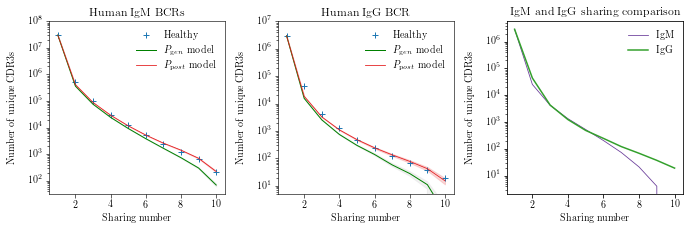

In [65]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(11,3))
plt.rc('text', usetex=True)

#Subplot 1

ax1.plot(np.arange(counts_igm.min(), counts_igm.max()+1), hist_igm, '+', label='Healthy', color=sns.color_palette("Paired")[1], markersize=6, mew=1)

ax1.plot(snumber, hist_igm_sim, color='green',linestyle='-',linewidth = 1, label='$P_{\mathrm gen}$ model')
ax1.fill_between(snumber,hist_igm_sim-M_igm_nosel_error,hist_igm_sim+M_igm_nosel_error,alpha=0.3,color='lightgray')

ax1.plot(snumber, M_igm_post, color=sns.color_palette("Paired")[5],linewidth = .8, label='$P_{\mathrm post}$ model')
ax1.fill_between(snumber,M_igm_post-M_igm_post_error,M_igm_post+M_igm_post_error,alpha=0.3,color='lightcoral')

ax1.set_yscale('log')
ax1.set_xlabel('Sharing number')
ax1.set_ylabel('Number of unique CDR3s',labelpad=12)
ax1.set_title('Human IgM BCRs')

ax1.legend(frameon=False)
ax1.set_xlim([0.5,10.5])
ax1.set_ylim([0,10e7])

plt.setp(ax1.spines.values(), linewidth=.6)

ax1.xaxis.set_tick_params(width=.6)
ax1.yaxis.set_tick_params(width=.6)

#Subplot 2

ax2.plot(np.arange(counts_igg.min(), counts_igg.max()+1), hist_igg, '+',label='Healthy',color=sns.color_palette("Paired")[1],markersize=6, mew=1)

ax2.plot(snumber, hist_igg_sim, color='green',linestyle='-',linewidth = 1, label='$P_{\mathrm gen}$ model')
ax2.fill_between(snumber,hist_igg_sim-M_igg_nosel_error,hist_igg_sim+M_igg_nosel_error,alpha=0.3,color='lightgray')

ax2.plot(snumber, M_igg_post, color=sns.color_palette("Paired")[5],linewidth=.8, label='$P_{\mathrm post}$ model')
ax2.fill_between(snumber,M_igg_post-M_igg_post_error,M_igg_post+M_igg_post_error,alpha=0.3,color='lightcoral')


ax2.set_yscale('log')
ax2.set_xlabel('Sharing number')
ax2.set_ylabel('Number of unique CDR3s',labelpad=12)
ax2.set_title('Human IgG BCR')


ax2.legend(frameon=False)
ax2.set_xlim([0.5,10.5])
ax2.set_ylim([0.5e1,1e7])

plt.setp(ax2.spines.values(), linewidth=.6)

ax2.xaxis.set_tick_params(width=.6)
ax2.yaxis.set_tick_params(width=.6)

# Subplot 3

ax3.plot(snumber, hist_igmg,label='IgM', color=sns.color_palette("Paired")[9],linewidth = .8)
#ax3.fill_between(snumber, np.array(hist_igmg)-hist_igmg_error,np.array(hist_igmg)+hist_igmg_error, alpha=0.2, color=sns.color_palette("Paired")[8])

ax3.plot(snumber, hist_igg, color=sns.color_palette("Paired")[3], label='IgG')
#ax3.fill_between(snumber, np.array(hist_igg)-M_igg_post_error,np.array(hist_igg)+M_igg_post_error, alpha=0.2, color=sns.color_palette("Paired")[2])

ax3.set_yscale('log')
ax3.set_xlabel('Sharing number')
ax3.set_ylabel('Number of unique CDR3s',labelpad=12)
ax3.set_title('IgM and IgG sharing comparison')

ax3.legend(frameon=False)




  
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

fig.savefig('/home/ruiz/Figure2_1.pdf',bbox_inches='tight')

plt.show()

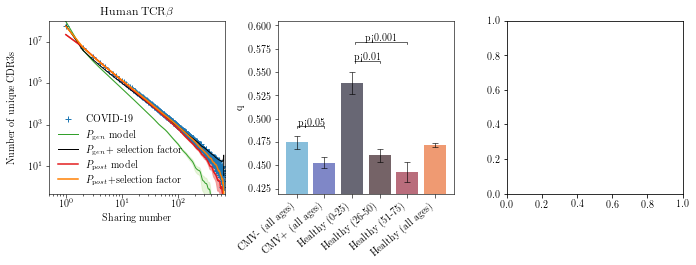

In [47]:
fig, ((ax4,ax5,ax6)) = plt.subplots(1,3,figsize=(11,3))
plt.rc('text', usetex=True)


# Subplot 4

ax4.plot(np.arange(1, 666), hist_tcr, '+', label='COVID-19',color=sns.color_palette("Paired")[1],markersize=6, mew=1)

ax4.plot(snumber_tcr, Mpgen_tcr, color=sns.color_palette("Paired")[3],linestyle='-',linewidth = 1, label='$P_{\mathrm gen}$ model')
ax4.fill_between(snumber_tcr,Mpgen_tcr-Mpgen_tcr_error,Mpgen_tcr+Mpgen_tcr_error,alpha=0.3,color=sns.color_palette("Paired")[2])

ax4.plot(snumber_tcr, Mpgen_q_tcr, color='black',linestyle='-',linewidth = 1, label='$P_{\mathrm gen} +$ selection factor')
ax4.fill_between(snumber_tcr,Mpgen_q_tcr-Mpgen_q_tcr_error,Mpgen_q_tcr+Mpgen_q_tcr_error,alpha=0.3,color='lightgray')

ax4.plot(snumber_tcr, Mpost_tcr, color=sns.color_palette("Paired")[5], label='$P_{\mathrm post}$ model')
ax4.fill_between(snumber_tcr,Mpost_tcr-Mpost_tcr_error,Mpost_tcr+Mpost_tcr_error,alpha=0.7,color='lightcoral')

ax4.plot(snumber_tcr, Mpost_q_tcr, color=sns.color_palette("Paired")[7], label='$P_{\mathrm post}$+selection factor')
ax4.fill_between(snumber_tcr,Mpost_q_tcr-Mpost_q_tcr_error,Mpost_q_tcr+Mpost_q_tcr_error,alpha=0.7,color=sns.color_palette("Paired")[6])



ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('Sharing number')
ax4.set_ylabel('Number of unique CDR3s',labelpad=12)
ax4.set_title(r'Human TCR$\beta$')

ax4.legend(frameon=False, loc='lower left')
ax4.set_xlim([0.5,700])
ax4.set_ylim([0.5,10e7])

plt.setp(ax4.spines.values(), linewidth=.6)

ax4.xaxis.set_tick_params(width=.6)
ax4.yaxis.set_tick_params(width=.6)

# Subplot 5

ax5.bar(x_pos, q_values,
       yerr=error,
       align='center',
       alpha=0.7,
       color = sns.color_palette("icefire"),
       error_kw=dict(lw=.6, capsize=3, capthick=.6))

# statistical annotation
x01_1, x01_2 = 0,1
y1,h,col = 0.49, 0.002, 'k'
x12_1, x12_2 = 1,1.9
y2 = 0.56
x23_1, x23_2 = 2.1,3
y3 = y2
x02_1, x02_2 = 0, 1.9
y4 = 0.58
x45_1, x45_2 = 4,5
y5 = y1
x24_1, x24_2 = 2.1, 4
y6 = y4
x25_1, x25_2 = 2.1,5
y7 = 0.59
x15_1, x15_2 = 1,5
y8 = 0.6
h2 = 0.0015

ax5.plot([x01_1, x01_1, x01_2, x01_2], [y1, y1+h, y1+h, y1], lw=.6, c=col)
ax5.text((x01_1+x01_2)*.5, y1+h2, 'p<0.05', ha='center', va='bottom', color=col)
#plt.plot([x12_1, x12_1, x12_2, x12_2], [y2, y2+h, y2+h, y2], lw=.6, c=col)
#plt.text((x12_1+x12_2)*.5, y2+h2, '**', ha='center', va='bottom', color=col)
ax5.plot([x23_1, x23_1, x23_2, x23_2], [y3, y3+h, y3+h, y3], lw=.6, c=col)
ax5.text((x23_1+x23_2)*.5, y3+h2, 'p<0.01', ha='center', va='bottom', color=col)
#plt.plot([x02_1, x02_1, x02_2, x02_2], [y4, y4+h, y4+h, y4], lw=.6, c=col)
#plt.text((x02_1+x02_2)*.5, y4+h2, '**', ha='center', va='bottom', color=col)
#plt.plot([x45_1, x45_1, x45_2, x45_2], [y5, y5+h, y5+h, y5], lw=.6, c=col)
#plt.text((x45_1+x45_2)*.5, y5+h2, '*', ha='center', va='bottom', color=col)
ax5.plot([x24_1, x24_1, x24_2, x24_2], [y6, y6+h, y6+h, y6], lw=.6, c=col)
ax5.text((x24_1+x24_2)*.5, y6+h2, 'p<0.001', ha='center', va='bottom', color=col)
#plt.plot([x25_1, x25_1, x25_2, x25_2], [y7, y7+h, y7+h, y7], lw=.6, c=col)
#plt.text((x25_1+x25_2)*.5, y7+h2, '**', ha='center', va='bottom', color=col)
#plt.plot([x15_1, x15_1, x15_2, x15_2], [y8, y8+h, y8+h, y8], lw=.6, c=col)
#plt.text((x15_1+x15_2)*.5, y8+h2, '**', ha='center', va='bottom', color=col)

ax5.set_xticks(x_pos)
ax5.set_xticklabels(labels)
ax5.set_ylabel('q')

ax5.set(ylim=(0.42, 0.605))
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")

plt.setp(ax5.spines.values(), linewidth=.6)

ax5.xaxis.set_tick_params(width=.6)
ax5.yaxis.set_tick_params(width=.6)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

fig.savefig('/home/ruiz/Figure2_2.pdf',bbox_inches='tight')

plt.show()


In [ ]:
# tighten layout

plt.tight_layout(h_pad=1, w_pad=4, pad=2)

# Add panel labels
x1=.00
x2=.33
x3=.66

y1=.97

kwargs = {'fontsize':45, 'horizontalalignment':'left', 'verticalalignment':'top','weight' : 'bold'}

plt.figtext(x1, y1,'A', **kwargs)
plt.figtext(x2, y1,'B', **kwargs)
plt.fio gtext(x3, y1,'C', **kwargs)